### Лабораторная работа №3
Обработка текстов

Для лабораторной работы № 3 вам потребуется новый набор данных, содержащих в себе тексты (могут быть загружены из открытых источников СМИ, фанфиков, отчетов, …, либо взяты из одной из открытых коллекций текстов)

Необходимо провести векторизацию текстов с использованием двух методов:
частота или tf*idf;
статические или контекстуализированные векторные модели.
Полученные векторы текстов необходимо либо кластеризовать. На полученных кластерах необходимо обучить метод кластеризации и проверить точность его работы. Необходимо сравнить точность работы метода с и без применения морфологического анализа.


# **Imports**

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import string
import glob
import pymorphy2
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer # from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction
from pathlib import Path  

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.decomposition import IncrementalPCA

from mpl_toolkits.mplot3d import Axes3D

import umap.umap_ as umap

# import plotly
# import plotly.offline as py
# import plotly.graph_objs as go

morph = pymorphy2.MorphAnalyzer()

In [2]:
directory_path = "./text/"
text_files = glob.glob(f"{directory_path}/*.txt")
titles = text_files
titles

['./text\\Авиация.txt',
 './text\\Аграрная республика Равал.txt',
 './text\\Анакель.txt',
 './text\\Астромагнетика.txt',
 './text\\Атомолёт.txt',
 './text\\Всеобщий энгмор.txt',
 './text\\Жемчужина Горваса.txt',
 './text\\Зодчие.txt',
 './text\\ИИ.txt',
 './text\\Империя Мирсквэй.txt',
 './text\\Импульсное оружие.txt',
 './text\\Иркванская Империя.txt',
 './text\\Итхэльхам.txt',
 './text\\Кмоласа.txt',
 './text\\Кмоласса новый вариант.txt',
 './text\\Королевство Лихтддекхав.txt',
 './text\\Л-Вселенная.txt',
 "./text\\Либсд'Цвиах.txt",
 './text\\Лилвомард.txt',
 './text\\ЛСГ.txt',
 './text\\Магнито-левитационный привод.txt',
 './text\\Метательное вооружение.txt',
 './text\\Молниеносная трансгеника.txt',
 './text\\Мэджет.txt',
 './text\\Новый текстовый документ.txt',
 './text\\Нулевая точка.txt',
 './text\\Огнестрельное.txt',
 './text\\Олирия.txt',
 './text\\Оружие массового поражения.txt',
 './text\\Падение Олирии.txt',
 './text\\Плазменное вооружение новое.txt',
 './text\\Плазменное во

In [3]:
addition = '●–—“”«»'
chars = '[%s]+' % re.escape(string.punctuation + addition + string.digits)

# def morpho_corrector(text):
#     # замена символов в строке text на '' по шаблону chars
#     data = re.sub(chars, '', text).split()
        
#     return data

def morpho_corrector(text):
    # замена символов в строке text на '' по шаблону chars
    data = re.sub(chars, '', text).split()
    for i, word in enumerate(data):
        data[i] = morph.parse(word)[0].normal_form
        
    return data

In [4]:
print(morpho_corrector('Бакакошка! Кушал: корм, но хозяин хлопал и топал, чем испугал (глупого) бакота.'))

['бакакошка', 'кушать', 'корма', 'но', 'хозяин', 'хлопать', 'и', 'топать', 'чем', 'испугать', 'глупый', 'бакот']


In [5]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vikto\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
stopwords = nltk.corpus.stopwords.words('russian')

stop_extensions = ['что', 'это', 'так', 'вот', 'быть', 'как', 'в', 'к', 'на', 'большой', 'весь',
                   'всё', 'ещё', 'мочь', 'нибыть', 'свой', 'хороший', 'её', 'весьма', 'поскольку', 'хотя', 'мм']

count = 0
for word in stop_extensions:
    if word not in stopwords:
        stopwords.append(word)
        count += 1
count

14

In [155]:
stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [33]:
vectorizer = TfidfVectorizer(
                             input='filename',
                             analyzer='word',
                             tokenizer=morpho_corrector,
                             # sublinear_tf=True,
                             use_idf=True,
                            # max_features=10000,
                             min_df=0.01,
                             ngram_range=(1,1),
                             stop_words=stopwords
                            )
vectors = vectorizer.fit_transform(text_files)
names = vectorizer.get_feature_names_out()
data = vectors.todense().tolist()# Create a dataframe with the results
df = pd.DataFrame(data, columns=names)
df.shape

H:\Program Files\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'

H:\Program Files\Anaconda\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['имя', 'нея', 'ничто'] not in stop_words.



(66, 6487)

In [34]:
N = 10
for i in df.iterrows():
    print(i[1].sort_values(ascending=False)[:N])

авиация        0.472279
самолёт        0.343867
гражданский    0.182279
автомобиль     0.159887
достаточный    0.130863
технология     0.096907
грузовой       0.094456
цеппелин       0.094456
коллапс        0.094456
спонтанный     0.094456
Name: 0, dtype: float64
равал          0.425949
страна         0.235685
республика     0.190282
равалский      0.133055
местный        0.117843
государство    0.117447
аграрный       0.114463
хозяйство      0.100223
пищевой        0.100223
сельский       0.100223
Name: 1, dtype: float64
планет        0.190785
анакель       0.186769
дерево        0.156886
выход         0.156886
пребывание    0.145894
пустыня       0.145894
экватор       0.145894
гораздо       0.143089
менее         0.118591
период        0.111564
Name: 2, dtype: float64
двигатель         0.237500
резонатор         0.178818
установка         0.143734
тяга              0.142500
команда           0.142500
освоение          0.139504
безинерционный    0.119212
резонаторный      0.119212
бр

In [8]:
df.shape

(66, 31286)

In [35]:
tfidf_matrix = df

In [36]:
num_clusters = 7

km = KMeans(n_clusters=num_clusters, n_init=10)

km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

print(clusters)
print (km.labels_)

# MiniBatchKMeans
mbk  = MiniBatchKMeans(init='random', n_clusters=num_clusters) #(init='k-means++', ‘random’ or an ndarray)
mbk.fit_transform(tfidf_matrix)
mbk.fit(tfidf_matrix)
miniclusters = mbk.labels_.tolist()
print (mbk.labels_)

# DBSCAN
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=3).fit(tfidf_matrix)
labels = db.labels_
labels.shape
print(labels)

# Аггломеративная класстеризация
from sklearn.cluster import AgglomerativeClustering

agglo1 = AgglomerativeClustering(n_clusters=num_clusters, metric='euclidean')
answer = agglo1.fit_predict(tfidf_matrix)
answer.shape

H:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

H:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

H:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1



[3, 4, 6, 3, 3, 0, 6, 4, 3, 4, 1, 2, 3, 6, 2, 4, 2, 2, 2, 2, 3, 1, 2, 6, 4, 4, 1, 4, 1, 2, 5, 5, 1, 3, 2, 3, 2, 3, 4, 3, 3, 4, 4, 4, 6, 3, 2, 6, 3, 6, 2, 2, 2, 1, 6, 2, 1, 1, 1, 0, 4, 3, 6, 3, 2, 6]
[3 4 6 3 3 0 6 4 3 4 1 2 3 6 2 4 2 2 2 2 3 1 2 6 4 4 1 4 1 2 5 5 1 3 2 3 2
 3 4 3 3 4 4 4 6 3 2 6 3 6 2 2 2 1 6 2 1 1 1 0 4 3 6 3 2 6]
[1 0 1 0 6 6 1 6 0 6 6 3 4 1 6 6 2 6 6 6 6 0 6 1 6 6 6 0 6 6 1 1 1 6 6 0 4
 4 6 0 5 0 6 6 1 0 6 1 5 1 6 6 6 6 1 6 6 6 6 6 1 5 1 6 6 1]
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


H:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1930: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

H:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning:

MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=1



(66,)

In [37]:
#k-means
clusterkm = km.labels_.tolist()
#minikmeans
clustermbk = mbk.labels_.tolist()
#dbscan
clusters3 = labels
 #agglo
clusters4 = answer.tolist()

frame = pd.DataFrame(titles, index = [clusterkm])

#k-means
out = { 'title': titles, 'cluster': clusterkm }
frame1 = pd.DataFrame(out, index = [clusterkm], columns = ['title', 'cluster'])

# #mini
# out = { 'title': titles, 'cluster': clustermbk }
# frame_minik = pd.DataFrame(out, index = [clustermbk], columns = ['title', 'cluster'])

frame1['cluster'].value_counts()
# frame_minik['cluster'].value_counts()

cluster
2    16
3    15
4    12
6    10
1     9
0     2
5     2
Name: count, dtype: int64

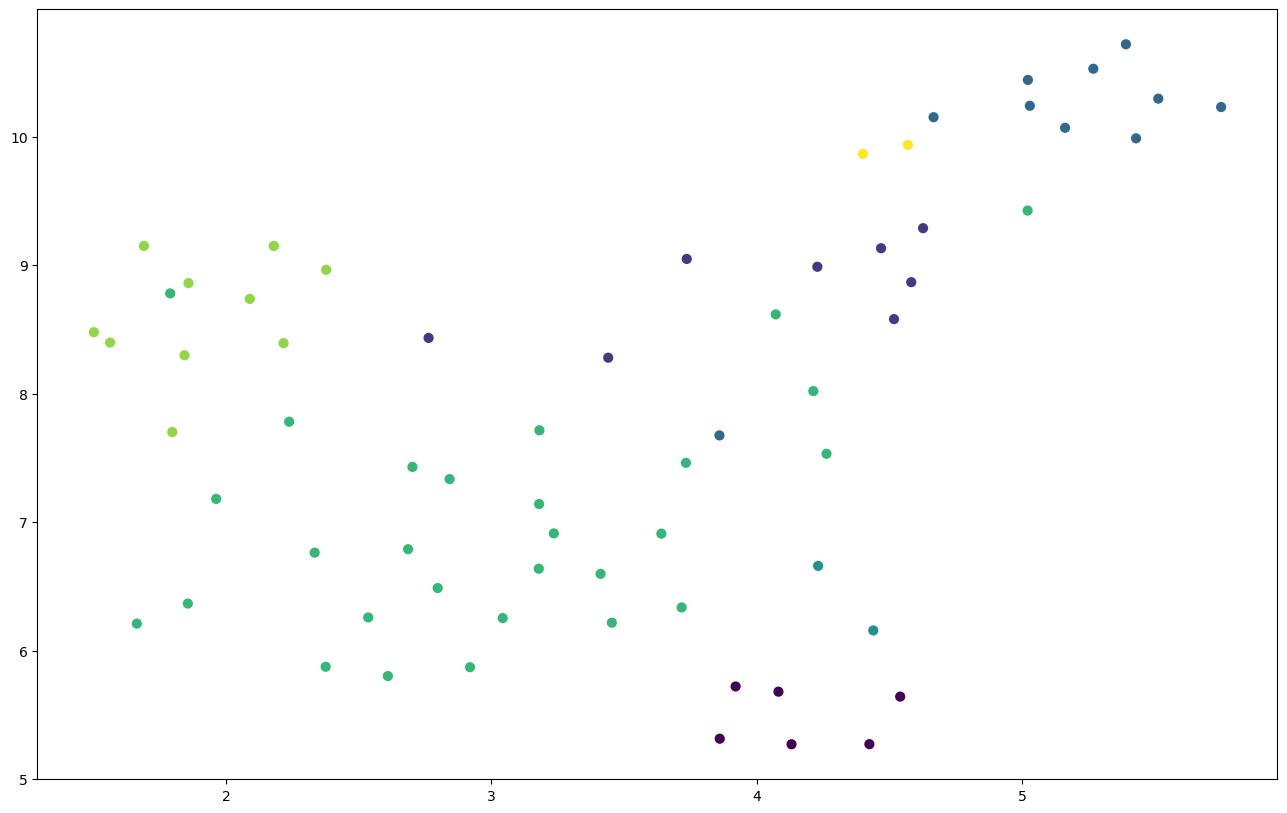

In [13]:
embedding = umap.UMAP(n_neighbors=20).fit_transform(tfidf_matrix) # преобразовываем

fig, ax = plt.subplots(figsize=(16, 10)) #figsize подбирается под ваш вкус

ax.scatter(embedding[:, 0], embedding[:, 1], s=40, c=clusterkm) #, norm='linear')

plt.show()

In [14]:
dist = 1 - cosine_similarity(tfidf_matrix)
dist.shape

(66, 66)

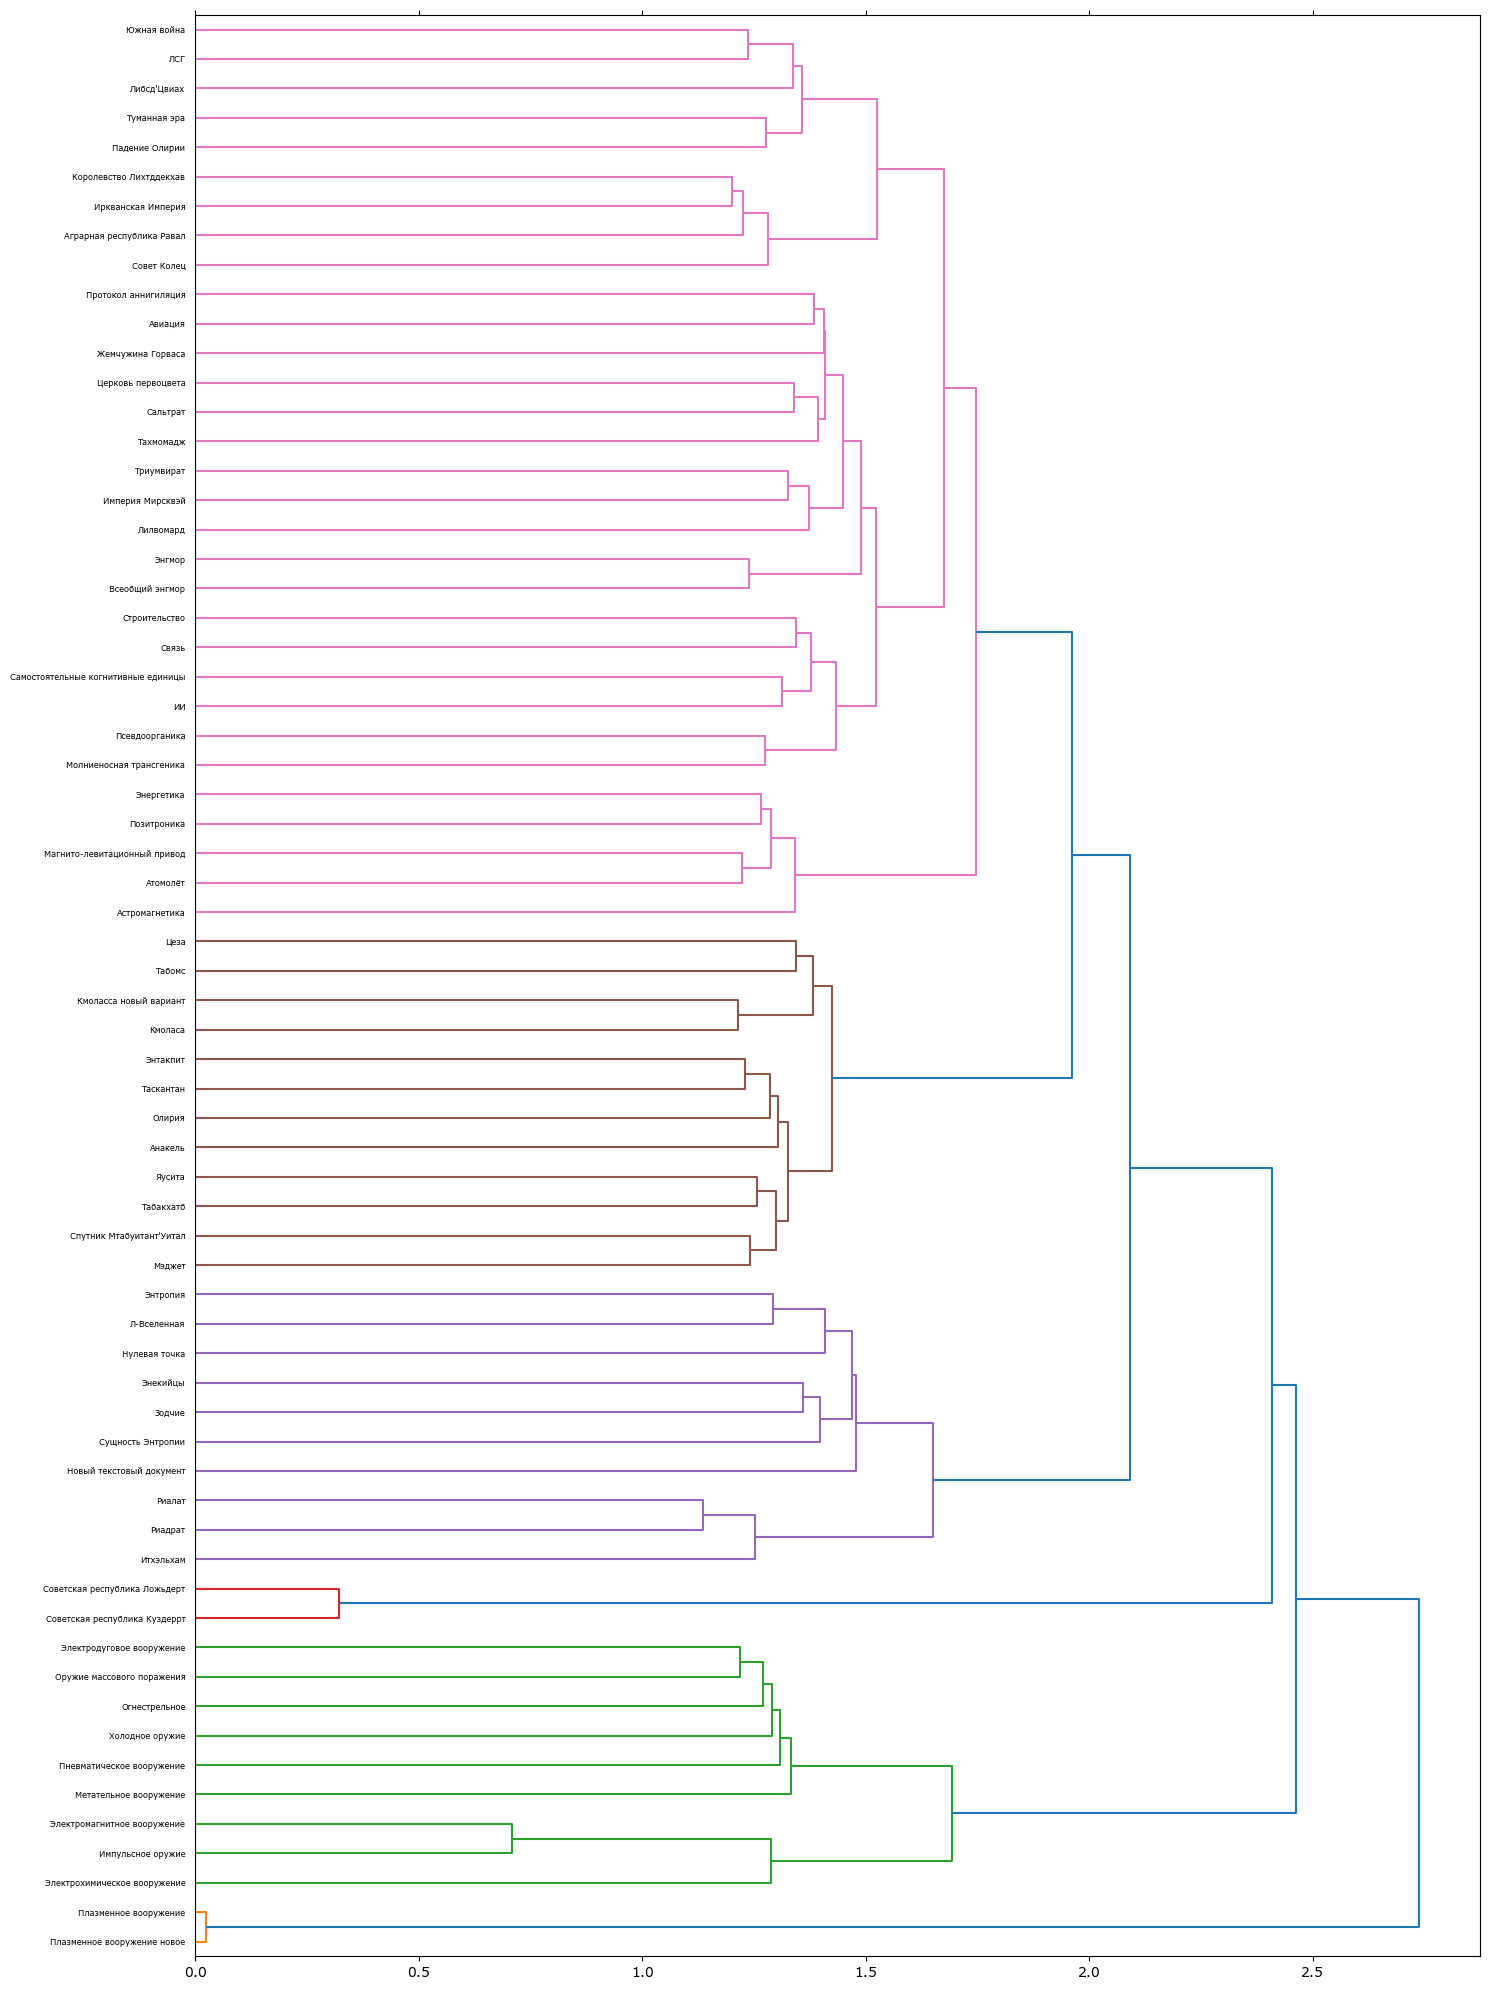

In [76]:
from scipy.cluster.hierarchy import ward, dendrogram

# вариант с косинусным расстоянием, но можно и с нечёткой схожестью слов
linkage_matrix = ward(dist)

fig, ax = plt.subplots(figsize=(15, 20))
ax = dendrogram(linkage_matrix, orientation="right", labels=[word.replace('./text\\', '').replace('.txt', '') for word in titles]);

plt.tick_params(\
    axis= 'x',
    which='both', 
    bottom='off',
    top='off',
    labelbottom='off')

plt.tight_layout() 

#сохраним рисунок
plt.savefig('ward_clusters2.png', dpi=200)

H:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

H:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

H:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

H:\Program Files\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

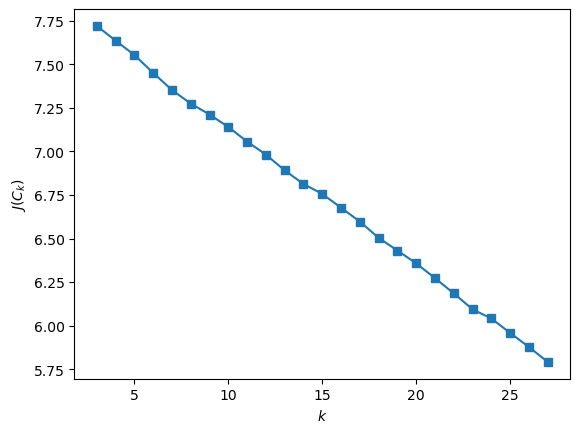

In [15]:
from sklearn.cluster import KMeans

inertia = []
for k in range(3, 28):
    kmeans = KMeans(n_init=10, n_clusters=k, random_state=42).fit(tfidf_matrix)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(3, 28), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Задание:
1. Выберите текстовую коллекцию, которая вм симптична (можно взять отсюда - http://romip.ru/ru/collections/index.html).
2. Поставьте библиотеку https://github.com/seatgeek/fuzzywuzzy (самый простой вариант).
3. Выделите нечеткие дубликаты документов.
4. Сдайте мне лабу, надо обозначить 
длина шингла; 
процент дубликатов от общего количества документов;
выделенные кластеры из нечетких дубликатов (желательно с названиями по смыслу).

In [16]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [62]:
# Берём N самых важных (по tf-idf) слов, сортируем их в алфавитном порядке и объединяем в одну строку для последующего
# сравнения двух таких строк для разных текстов. Поскольку ф-я возвращает, по сути, сходство, инвертируем выходное значение
def fuzzy_distance(a, b):
    N = 12
    temp1 = sorted(a.sort_values(ascending=False)[:N].keys().to_list())
    temp2 = sorted(b.sort_values(ascending=False)[:N].keys().to_list())

    similarity = fuzz.partial_ratio(temp1, temp2)
    
    return 100 - similarity

In [63]:
fuzzy_distance(tfidf_matrix.loc[0], tfidf_matrix.loc[1])

51

In [77]:
dist_matrix = np.empty((tfidf_matrix.shape[0], tfidf_matrix.shape[0]))

limit = 35
# вручную перебираем наши тексты и ищем дубликаты, выводя подозрения сразу (по такому принципу можно делать что 
# угодно дальше с дубликатами)
for row in tfidf_matrix.iterrows():
    for col in tfidf_matrix.iterrows():
        dist_matrix[row[0]][col[0]] = fuzzy_distance(row[1], col[1])
        
        if dist_matrix[row[0]][col[0]] <= limit and row[0] != col[0]:
            title_a = titles[row[0]].replace("./text\\", '').replace('.txt', '')
            title_b = titles[col[0]].replace("./text\\", '').replace('.txt', '')
            print(
f'''Предположительно обнаружены нечёткие дубликаты: {row[0]} {title_a} и {col[0]} {title_b}, сходство: {100 - dist_matrix[row[0]][col[0]]}'''
            )
        
print(counter)

Предположительно обнаружены нечёткие дубликаты: 5 Всеобщий энгмор и 59 Энгмор, сходство: 68.0
Предположительно обнаружены нечёткие дубликаты: 30 Плазменное вооружение новое и 31 Плазменное вооружение, сходство: 100.0
Предположительно обнаружены нечёткие дубликаты: 31 Плазменное вооружение и 30 Плазменное вооружение новое, сходство: 100.0
Предположительно обнаружены нечёткие дубликаты: 42 Советская республика Куздеррт и 43 Советская республика Ложьдерт, сходство: 82.0
Предположительно обнаружены нечёткие дубликаты: 43 Советская республика Ложьдерт и 42 Советская республика Куздеррт, сходство: 82.0
Предположительно обнаружены нечёткие дубликаты: 49 Таскантан и 65 Яусита, сходство: 67.0
Предположительно обнаружены нечёткие дубликаты: 59 Энгмор и 5 Всеобщий энгмор, сходство: 68.0
Предположительно обнаружены нечёткие дубликаты: 65 Яусита и 49 Таскантан, сходство: 67.0
66


In [51]:
dist_matrix

array([[ 0., 51., 49., ..., 52., 52., 50.],
       [51.,  0., 49., ..., 47., 44., 48.],
       [49., 49.,  0., ..., 43., 47., 43.],
       ...,
       [52., 47., 43., ...,  0., 46., 51.],
       [52., 44., 47., ..., 46.,  0., 44.],
       [50., 48., 43., ..., 51., 44.,  0.]])

In [58]:
def icpa(dist):
    icpa = IncrementalPCA(n_components=3, batch_size=16)
    icpa.fit(dist)
    ddd = icpa.transform(dist)
    xs, ys, zs = ddd[:, 0], ddd[:, 1], ddd[:, 2]


    # куб
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xs, ys, zs, c=clusterkm)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

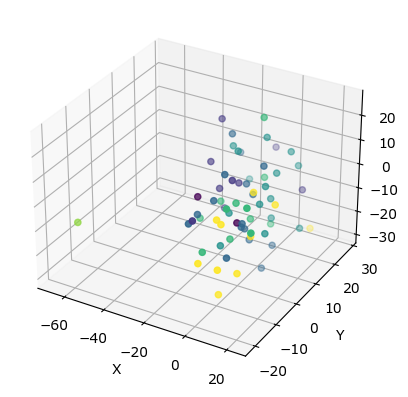

In [59]:
icpa(dist_matrix)

In [54]:
def interactive_cube(dist):
    icpa = IncrementalPCA(n_components=3, batch_size=16)
    icpa.fit(dist)
    ddd = icpa.transform(dist)
    xs, ys, zs = ddd[:, 0], ddd[:, 1], ddd[:, 2]

    trace1 = go.Scatter3d(
        x=xs,
        y=ys,
        z=zs,
        legendgroup="group",
        mode='markers',
        showlegend=True,
        text= [word.replace('./text\\', '').replace('.txt', f' {i}') for i, word in enumerate(titles)],
        marker=dict(
            size=12,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5
            ),
            color = clusterkm,
            opacity=0.8
        )
    )

    data = [trace1]
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig, filename='cluster-3d-plot')

In [55]:
interactive_cube(dist_matrix)

In [32]:

fuzzy_distance(tfidf_matrix.loc[42], tfidf_matrix.loc[43])

30

In [60]:
from matplotlib import rc

#можно сгенерировать цвета для кластеров
import random

def plain_scheme(dist):
    icpa = IncrementalPCA(n_components=2, batch_size=16)
    icpa.fit(dist)
    demo2 = icpa.transform(dist)
    xs, ys = demo2[:, 0], demo2[:, 1]
    
    #включаем русские символы на графике
    font = {'family' : 'Verdana'}#, 'weigth': 'normal'}
    rc('font', **font)

    def generate_colors(n):
        color_list = []
        for c in range(0,n):
            r = lambda: random.randint(0,255)
            color_list.append( '#%02X%02X%02X' % (r(),r(),r()) )
        return color_list

    #устанавливаем цвета
    cluster_colors = {0: '#ff0000', 1: '#ff0066', 2: '#ff0099',  3: '#ff00cc', 4: '#ff00ff',}
    #даем имена кластерам, но из-за рандома пусть будут просто 01234
    cluster_names = {0: '0',  1: '1', 2: '2',  3: '3', 4: '4', 5: '5', 6: '6', 7: '7'}
    #matplotlib inline

    #создаем data frame, который содержит координаты (из PCA) + номера кластеров и сами запросы
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusterkm, title=titles)) 
    #группируем по кластерам
    groups = df.groupby('label')

    fig, ax = plt.subplots(figsize=(16, 10)) #figsize подбирается под ваш вкус

    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name],  mec='none')
        ax.set_aspect('auto')
        ax.tick_params(        axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
        ax.tick_params(        axis= 'y',         
            which='both',     
            left='off',      
            top='off',       
            labelleft='off')

    ax.legend(numpoints=1)  #показать легенду только 1 точки

    #добавляем метки/названия в х,у позиции с поисковым запросом
    for i in range(len(df)):
        ax.text(df.iloc[i]['x'] + 0.01, df.iloc[i]['y'], df.iloc[i]['title'].replace('./text\\', '').replace('.txt', ''), size=6)  

    #показать график
    plt.show() 
    plt.close()

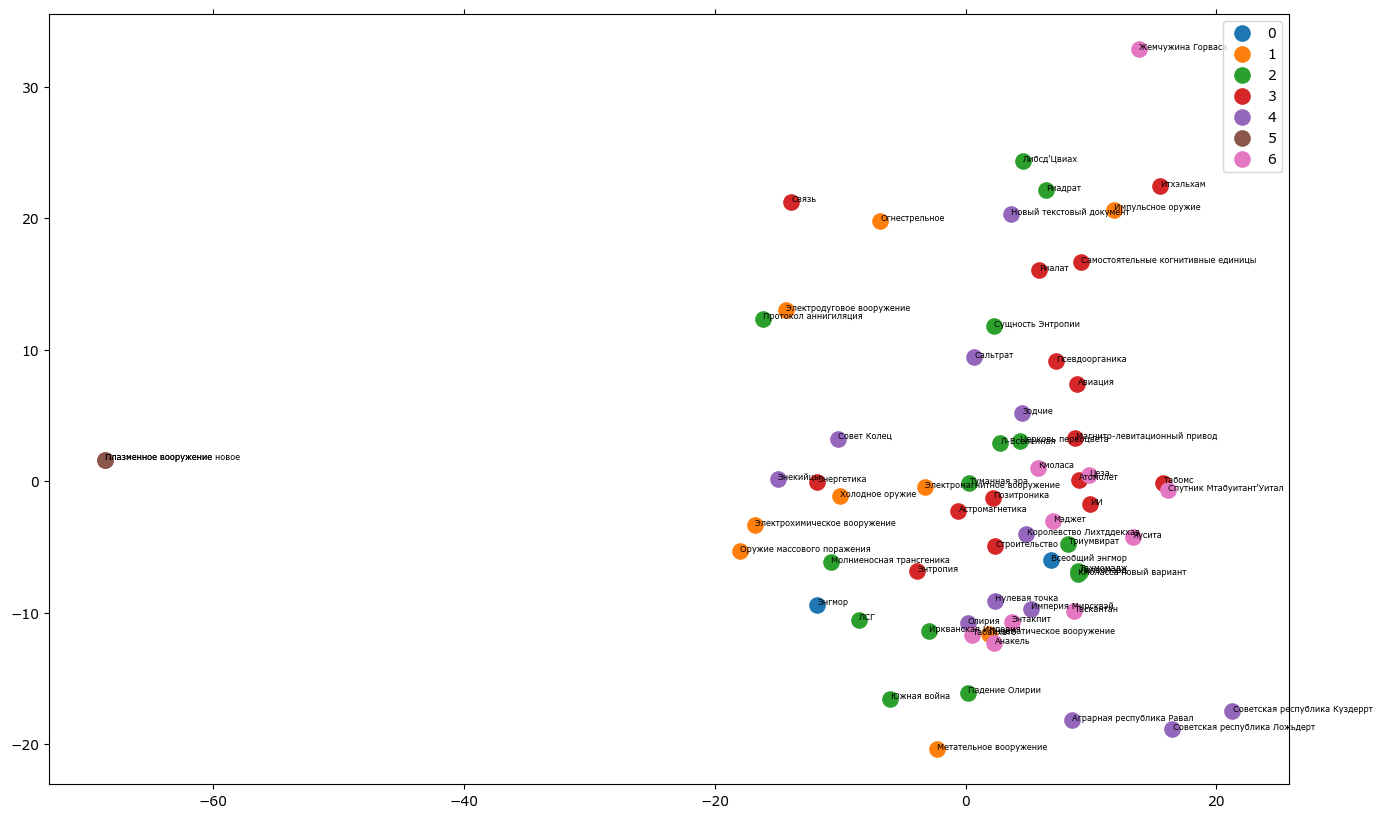

In [61]:
plain_scheme(dist_matrix)